In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

def clean_sample_and_concatenate(input_file, additional_input_file):
    # Load the first Excel file into a pandas DataFrame
    df = pd.read_excel(input_file)

    # Define a function to count words in a given string
    def count_words(text):
        # Convert to string to handle non-string data safely
        return len(str(text).split())

    # Filter rows where the first column has fewer than 6 words
    df = df[df.iloc[:, 0].apply(count_words) >= 6]

    # Randomly sample 2500 rows from the filtered DataFrame
    if len(df) >= 2500:
        df_sampled = df.sample(n=2500, random_state=42)  # random_state for reproducibility
    else:
        print("Not enough data to sample 2500 rows. Sampling all available rows instead.")
        df_sampled = df

    # Load the second Excel file into another DataFrame and skip the first row
    df_additional = pd.read_excel(additional_input_file)

    # Ensure both dataframes have the same columns in the same order
    df_additional = df_additional[df_sampled.columns]

    # Concatenate the sampled DataFrame with the additional DataFrame
    df_concatenated = pd.concat([df_sampled, df_additional], ignore_index=True, sort=False)

    # Return the concatenated DataFrame for further use in Python
    return df_concatenated

# Specify the input file paths
input_file = 'test_CNN_Article.xlsx'
additional_input_file = 'Generated data.xlsx'

# Call the function with the specified files
df_final = clean_sample_and_concatenate(input_file, additional_input_file)

In [8]:
print(df_final.head())

                                                text  label
0  arch 22 in Sevastopol.Hide Caption 142 of 168 ...      0
1  A quick summary of the British intelligence re...      0
2  Story highlightsRoger Federer beats Frenchman ...      0
3  Story highlightsFour surviving copies of the 1...      0
4   (CNN)It's almost like a scene out of a classi...      0


In [16]:
df_final['label'] = df_final['label'].astype(int)

In [17]:
# Shuffling the data
shuffled_essays_data = df_final.sample(frac=1, random_state=21)

In [18]:
shuffled_essays_data.head()

,text,label
4033,Story highlightsAssange supporters plan a rall...,1
4733,Story highlightsStriker Jamie Vardy has 15 goa...,1
609,(CNN)Germany recorded its biggest win in 15 y...,0
4263,London (CNN)The Duke and Duchess of Sussex hav...,1
533,"Story highlightsEleven people survived, with n...",0


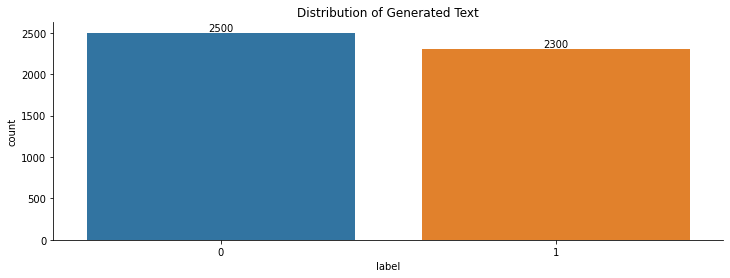

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots with a specific size
f, ax = plt.subplots(figsize=(12, 4))

# Remove the top and right spines from plot
sns.despine()

# Correctly call sns.countplot() by specifying the data source and the column
ax = sns.countplot(data=shuffled_essays_data, x="label")

# Retrieve the counts of each category in the 'label' column
abs_values = shuffled_essays_data['label'].value_counts().values

# Label the bars in the countplot with their respective counts
ax.bar_label(container=ax.containers[0], labels=abs_values)

# Set the title of the plot
ax.set_title("Distribution of Generated Text")

# Show the plot
plt.show()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Rajpal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
# Converting text to numerical form
X = vectorizer.fit_transform(shuffled_essays_data["text"])
Y = shuffled_essays_data["label"]

In [23]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    )

In [25]:
import numpy as np
np.size(y_train)

3600

In [26]:
counts = np.bincount(y_test)
number_of_zeros = counts[0]
number_of_ones = counts[1]

print(f"Number of 0s: {number_of_zeros}")
print(f"Number of 1s: {number_of_ones}")

Number of 0s: 632
Number of 1s: 568


In [27]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

MultinomialNB()

In [28]:
# Model Evaluation
y_pred = classifier_NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [29]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.71
Precision: 0.93
Recall: 0.42


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [31]:
# Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.79
Precision: 0.80
Recall: 0.75


In [32]:
# Changing the number of tree and the criterion

classifier_gini = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier_gini.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = classifier_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.88
Precision: 0.84
Recall: 0.90


In [34]:
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression(random_state=0)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [35]:
y_pred = classifier_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.86
Precision: 0.87
Recall: 0.84
